In [1]:
def file_len(fname):
    minimo=9999999
    maximo=0
    with open(fname) as f:
        for i, l in enumerate(f):
            if len(l)<minimo:
                minimo=len(l)
            if len(l)>maximo:
                maximo=len(l)
    return [i + 1, minimo, maximo]


# Numero de lineas, longitud minima y maxima de bookings


In [2]:
file_len('/home/dsc/data/challenge/bookings.csv')

[10000011, 358, 436]

# Numero de lineas, longitud minima y maxima de searches

In [3]:
file_len('/home/dsc/data/challenge/searches.csv')

[20390199, 66, 529]

In [4]:
import pandas as pd

In [5]:
chunk_size=1000000
arrs_pax_chunk=pd.read_csv('/home/dsc/data/challenge/bookings.csv'
                     , sep='^', usecols=['arr_port','pax'], chunksize=chunk_size)

In [6]:
arrs_pax=pd.DataFrame(columns=['arr_port','pax'])
for chunk in arrs_pax_chunk:
    chunk['arr_port']=chunk['arr_port'].str.strip().str.upper()
    arrs_pax=arrs_pax.append(chunk.groupby('arr_port').sum('pax').reset_index(),ignore_index=True)

    
arrs_pax.head()


,arr_port,pax
0,AAB,3
1,AAE,81
2,AAL,81
3,AAN,2
4,AAQ,165


# Los 10 aeropuertos con más pasajeros

In [7]:
arrs_pax.groupby('arr_port').sum('pax').sort_values(by='pax',ascending=False)[0:10]

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


In [8]:
arrs_pax.groupby('arr_port').sum('pax').sort_values(by='pax',
            ascending=False)[0:10].to_csv('aeropuertos_mas_pasajeros.csv',sep='^')

In [9]:
del arrs_pax

# EJERCICIO 3

In [63]:
date_dest_chunk=pd.read_csv('/home/dsc/data/challenge/searches.csv', sep='^', usecols=['Date','Destination']
                     , chunksize=chunk_size)

In [64]:
busq_Madrid=pd.DataFrame(columns=['Meses','Busquedas'])
busq_Malaga=pd.DataFrame(columns=['Meses','Busquedas'])
busq_Barcelona=pd.DataFrame(columns=['Meses','Busquedas'])
for chunk in date_dest_chunk:
    chunk['Destination']=chunk['Destination'].str.strip().str.upper()
    
    chunk['Meses']=chunk['Date'].str[0:7]
    
    busq_Madrid_chunk=chunk[chunk['Destination']=='MAD']
    busq_Malaga_chunk=chunk[chunk['Destination']=='AGP']
    busq_Barcelona_chunk=chunk[chunk['Destination']=='BCN']
    
    busq_Madrid=busq_Madrid.append(
            busq_Madrid_chunk[['Meses']].value_counts(sort=False).reset_index().rename(columns={0:'Busquedas'})
            , ignore_index=True)
    busq_Malaga=busq_Malaga.append(
            busq_Malaga_chunk[['Meses']].value_counts(sort=False).reset_index().rename(columns={0:'Busquedas'})
            , ignore_index=True)
    busq_Barcelona=busq_Barcelona.append(
            busq_Barcelona_chunk[['Meses']].value_counts(sort=False).reset_index().rename(columns={0:'Busquedas'})
            , ignore_index=True)



In [65]:
busq_Madrid=busq_Madrid.groupby('Meses').sum('Busquedas').sort_values(by='Meses').reset_index().rename(columns={'Busquedas':'Busquedas_Madrid'})
busq_Malaga=busq_Malaga.groupby('Meses').sum('Busquedas').sort_values(by='Meses').reset_index().rename(columns={'Busquedas':'Busquedas_Malaga'})
busq_Barcelona=busq_Barcelona.groupby('Meses').sum('Busquedas').sort_values(by='Meses').reset_index().rename(columns={'Busquedas':'Busquedas_Barcelona'})

In [70]:
busq_joint=busq_Madrid.merge(right=busq_Malaga, how='outer',on='Meses')
busq_joint=busq_Barcelona.merge(right=busq_joint, how='outer',on='Meses')

In [71]:
busq_joint=busq_joint.set_index('Meses')

<AxesSubplot:xlabel='Meses'>

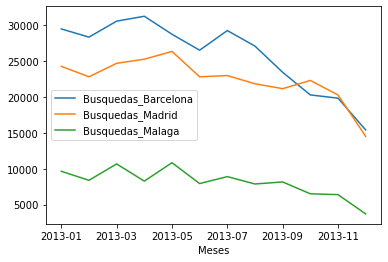

In [72]:
busq_joint.plot()

# Ejercicio 4

In [74]:
searches=pd.read_csv('/home/dsc/data/challenge/searches.csv', sep='^', nrows=10)
bookings=pd.read_csv('/home/dsc/data/challenge/bookings.csv', sep='^', nrows=10)

In [78]:
pd.set_option('display.max_columns',None)

In [79]:
searches

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
5,2013-01-01,22:00:28,MPT,3561a60621de06ab1badc8ca55699ef3,US,IAH,BLR,1,2,IAH,BLR,2013-02-14,NaN,NaN,BLR,IAH,2013-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
6,2013-01-01,10:47:14,MPT,d327ca6e35cc6732d4709828327ac7c1,DK,CPH,PAR,1,2,CPH,PAR,2013-03-02,NaN,NaN,PAR,CPH,2013-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
7,2013-01-01,23:39:49,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,PAR,DUB,1,2,PAR,DUB,2013-02-12,NaN,NaN,DUB,PAR,2013-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
8,2013-01-01,17:08:46,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,DUS,ACE,1,2,DUS,ACE,2013-03-30,NaN,NaN,ACE,DUS,2013-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
9,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1,2,FRA,BGW,2013-02-26,NaN,NaN,BGW,FRA,2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ


In [80]:
bookings

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
5,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,DEN,US,LGA,NYC,US,DEN,DEN,US,DEN,DEN,US,LGA,NYC,US,DENLGA,DENNYC,USUS,0,DENLGA,FK,W,Y,2013-04-07 10:23:00,2013-04-07 16:14:24,1,2013,3,NULL
6,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,DEN,US,LGA,NYC,US,DEN,DEN,US,LGA,NYC,US,DEN,DEN,US,DENLGA,DENNYC,USUS,0,LGADEN,FK,K,Y,2013-04-11 11:15:00,2013-04-11 13:06:24,1,2013,3,NULL
7,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,TYO,JP,SIN,SIN,SG,HND,TYO,JP,NRT,TYO,JP,SIN,SIN,SG,NRTSIN,SINTYO,JPSG,1,NRTSIN,XR,Q,Y,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL
8,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,TYO,JP,SIN,SIN,SG,HND,TYO,JP,SIN,SIN,SG,PEN,PEN,MY,PENSIN,PENSIN,MYSG,1,SINPEN,WS,Y,Y,2013-04-16 15:45:00,2013-04-16 17:15:29,2,2013,3,NULL
9,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,TYO,JP,SIN,SIN,SG,HND,TYO,JP,PEN,PEN,MY,BKK,BKK,TH,BKKPEN,BKKPEN,MYTH,1,PENBKK,EQ,Y,Y,2013-04-18 08:00:00,2013-04-18 08:53:56,2,2013,3,NULL
